# 📘 Lab 6 — ROC Curve and Decision Thresholds

## Binary Classification with Logistic Regression

### 🎯 Lab Objectives

By the end of this lab, students will be able to:

- Load a real-world dataset automatically using scikit-learn 
    - for studying purpose, we use a standard dataset
- Train a Logistic Regression classifier  
- Understand class probabilities (`predict_proba`)  
- Build and interpret a ROC curve  
- Understand how changing the decision threshold affects predictions  
- Connect confusion matrix, TPR, FPR, and ROC  

### 🧪 Dataset Used

**Breast Cancer Wisconsin Dataset**

Binary classification problem:

- **0 → Malignant (cancer)**  
- **1 → Benign (no cancer)**


## 📦 0. Setup — Import Libraries

### 📌 Why this matters

We fix `random_state` so everyone gets the same results.


## 📊 1. Load and Explore the Dataset (Auto-download)

### 📌 Shortcut

This dataset is automatically downloaded by scikit-learn.  
No manual files required.


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Look at the descriptions, consider the ranges, are they very diverse in the various features? 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 📂 Exploring Other Datasets in scikit-learn

In this lab, we use a dataset that is **automatically downloaded** from `scikit-learn`.
However, `scikit-learn` provides **many other datasets** that you can use to practise and experiment.

### 🔗 Official scikit-learn dataset catalogue
You can view **all available datasets** here:  
https://scikit-learn.org/stable/datasets.html

On this page, you will find:
- **Classification datasets** (binary and multiclass)
- **Regression datasets**
- **Real-world datasets** (e.g. housing, text data)
- **Synthetic datasets** (for teaching and experimentation)

### 💡 Why this matters
In real data science projects:
- Data rarely comes from a single source
- Different datasets require different modelling choices
- The same evaluation tools (ROC, thresholds) apply across domains

You are encouraged to explore other datasets and try applying the same workflow used in this lab.


Check the ranges computing `max - min`

In [5]:
# compute range (max - min) for each feature and display sorted


,max_minus_min
worst area,4068.800000
mean area,2357.500000
area error,535.398000
worst perimeter,200.790000
mean perimeter,144.710000
worst texture,37.520000
mean texture,29.570000
worst radius,28.110000
perimeter error,21.223000
mean radius,21.129000


Dataset shape: (569, 30)

Target counts:
target
1    357
0    212
Name: count, dtype: int64


## ✂️ 2. Train–Test Split


Train size: (455, 30)
Test size: (114, 30)


### 📌 Why stratify?

Keeps the same class balance in train and test sets.


## 🌳 3. Train a Logistic Regression Classifier

Logistic Regression trained.


### 📌 Why Logistic Regression?
- Naturally outputs class probabilities  
- Good for teaching threshold effects

## ✅ 4. Standard Evaluation (Default Threshold = 0.5)
This will be the __baseline__

Accuracy: 0.9649122807017544

Confusion Matrix:
[[40  2]
 [ 2 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### 📌 Important

`predict()` uses a fixed threshold of **0.5**.  

This is not always optimal.


## 🎯 5. Predicted Probabilities (`predict_proba`)
- `predict_proba` returns a 2D array with as many columns as the number of distinct labels, ordered by label value, in this case they are `0` and `1`
    - the sum of each row is, obviously, one
- in a __binary__ problem it is sufficient to consider only one column, we will focus on the __positive__ values, that are in column `1`
- show the histogram of predicted probabilities for positive class


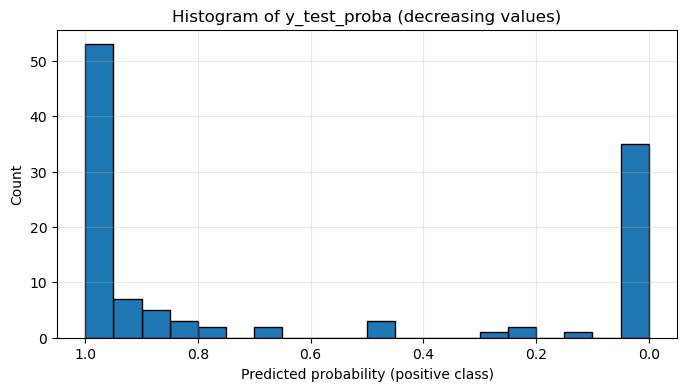

In [11]:
 # Probability estimates for the positive class

# sort probabilities in decreasing order and show top values

# histogram (invert x-axis so bins show decreasing values left→right)


### 📌 Key Concept (Very Important)

For each sample, the model says:

> “I am c% confident this is True”

These probabilities allow us to:

- Change thresholds  
- Draw ROC curves


## 📈 6. ROC Curve and AUC
- since the ranges of the features are very diverse, we standardize the features
- we optimize the hyperparameters of Logistic Regression with `GridSearchCV`

Prepare the environment for the optimization

Optimize with `GridSearchCV` and show the results

In [13]:


# Best model and CV score


# Replace classifier with the tuned pipeline


# Evaluate on test set

 # ROC AUC on test set
 # Predictions on test set - default threshold 0.5



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best CV ROC AUC: 0.9959752321981423
Test ROC AUC: 0.9957010582010581
Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Observation
This is already better than the __baseline__

ROC AUC: 0.996


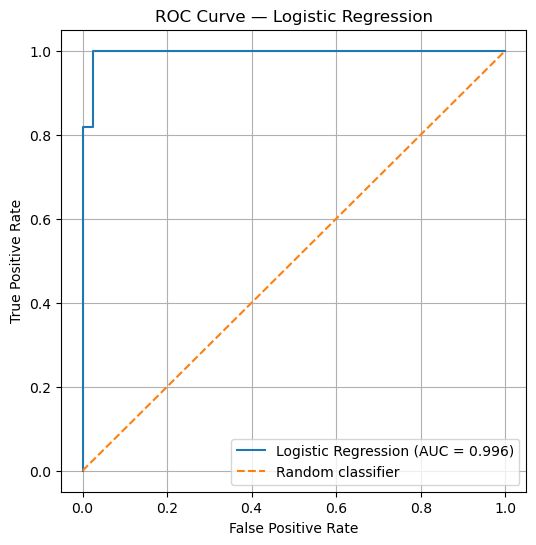

### 📌 Interpretation

- **AUC close to 1** → very good model  
- **Diagonal line** → random guessing


## 🔁 7. Changing the **Decision Threshold** (Core Concept)

### Helper Function


### Try Different Thresholds


### 📌 This is what the professor meant

- You are not changing the model  
- You are changing how strict the decision is


## 📐 8. Threshold → TPR and FPR
Build the list of thresholds to test
- from 0 to 1, step 0.25
- `np.linspace` is the best solution to generate equi-spaced lists of floating points values

In [17]:

# thresholds

In [18]:
 # use formatted string for consistent display
 # the threshold as index


,accuracy,precision,recall,f1_score
threshold,,,,
0.000,0.632,0.632,1.000,0.774
0.025,0.939,0.911,1.000,0.954
0.050,0.947,0.923,1.000,0.960
0.075,0.956,0.935,1.000,0.966
0.100,0.956,0.935,1.000,0.966
0.125,0.956,0.935,1.000,0.966
0.150,0.965,0.947,1.000,0.973
0.175,0.974,0.960,1.000,0.980
0.200,0.982,0.973,1.000,0.986


### 📌 Connection to ROC

- Each threshold = one point on the ROC curve  
- ROC shows all thresholds at once


Choose the threshold, make the final prediction and show the confusion matrix

In [19]:
# low threshold to increase recall of positives (Benignant)

# predict on test set using the chosen threshold and show confusion matrix




confusion_matrix
[[41  1]
 [ 0 72]]
Threshold: 0.35	 Missed positives (false negatives): 0	 Missed negatives (false positives): 1


In [20]:
# high threshold to increase precision

# predict on test set using the chosen threshold and show confusion matrix




confusion_matrix
[[42  0]
 [15 57]]
Threshold: 0.925	 Missed positives (false negatives): 15	 Missed negatives (false positives): 0


In [21]:
# middle threshold for balanced performance

# predict on test set using the chosen threshold and show confusion matrix



confusion_matrix
[[41  1]
 [ 1 71]]
Threshold: 0.5	 Missed positives (false negatives): 1	 Missed negatives (false positives): 1


### 🧠 Teaching Interpretation (Simple Words)

**Low Threshold (0.35)**

- Relaxed decision  
- No missed positives  
- 1 missed negative (cancer non predicted)

**High Threshold (0.925)**

- Very strict decision  
- Several false alarms  
- No missed cancers  

👉 Choosing a threshold depends on the application

Observation: the default threshold 0.5 used in point 6 above gives 1 false alarm and 1 missed cancer

## 🧾 9. Lab Summary

In this lab, students learned to:

- Automatically load a real dataset  
- Train a Logistic Regression classifier  
- Use `predict_proba` to obtain probabilities  
- Build and interpret a ROC curve  
- Understand decision thresholds  
- See how thresholds affect:  
  - Confusion matrix  
  - TPR and FPR  
- Understand what ROC really represents
